<a href="https://colab.research.google.com/github/Gennifer2001/tesis/blob/main/Presentacion_loto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Importar librerías necesarias***

In [1]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from statistics import mean

In [2]:
!pip install ete3
import ete3
from ete3 import Tree
import scipy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from scipy.cluster import hierarchy
import networkx,pylab
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from scipy.spatial.distance import pdist,squareform
import random
from IPython.display import display, Latex
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ete3: filename=ete3-3.1.3-py3-none-any.whl size=2273786 sha256=852906f07f6af0c71f5f26e4ee99e3bf1a9a09b9fa8accd70d8534fc04b20834
  Stored in directory: /root/.cache/pip/wheels/a0/72/00/1982bd848e52b03079dbf800900120bc1c20e92e9a1216e525
Successfully built ete3


### ***Cargar y limpiar base de datos***

In [3]:
 url = 'https://raw.githubusercontent.com/Gennifer2001/tesis/main/psyco.csv'
df = pd.read_csv(url)
df['age'] = df['age'].replace("Dec-18", "12-18", regex=True)
df

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,12-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,40-50,Female,Entrepreneur,NaN,9,9,0.5,2,1,0.5,...,0.5,0.0,0.0,10,1,Complete Physical Attendance,Yes,NaN,9,NaN
1171,26-32,Female,Homemaker,NaN,5,12,0.5,3,5,-0.5,...,0.0,-0.5,-0.5,100,111,Complete Physical Attendance,Maybe,NaN,5,NaN
1172,26-32,Male,Working Professional,Engineering,9,11,0.5,3,2,0.5,...,0.5,0.0,0.0,1111,110,Complete Physical Attendance,Maybe,NaN,9,NaN
1173,26-32,Male,Working Professional,Engineering,11,12,1.5,2,2,0.0,...,-1.0,0.0,-0.5,1111,1100,Complete Physical Attendance,Yes,NaN,11,NaN


In [4]:
df1 = df.drop(['age','gender', 'occupation','line_of_work','prefer','certaindays_hw','Unnamed: 19','travel+work','like_hw','dislike_hw','time_bp.1','Unnamed: 19'], axis=1)
nombres =['time_bp','time_dp','travel_time','easeof_online','home_env','prod_inc','sleep_bal','new_skill','fam_connect','relaxed','self_time']
df1

,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
0,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5
1,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0
2,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5
3,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5
4,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1170,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
1171,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
1172,9,11,0.5,3,2,0.5,0.5,0.5,0.5,0.0,0.0
1173,11,12,1.5,2,2,0.0,0.0,0.0,-1.0,0.0,-0.5


Eliminaremos todos las variables no numericas y las que no nos aportan información

In [5]:
# @title
df2 = df.drop(['gender', 'occupation','line_of_work','prefer','certaindays_hw','Unnamed: 19','travel+work','like_hw','dislike_hw','time_bp.1','Unnamed: 19'], axis=1)
imge = df2.head(10)
imge

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
0,19-25,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5
1,12-18,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0
2,19-25,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5
3,19-25,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5
4,19-25,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0
5,19-25,5,7,0.5,4,4,-1.0,-1.0,0.0,-0.5,0.0,0.0
6,19-25,5,4,0.5,1,3,0.5,0.5,1.0,0.5,1.0,1.0
7,19-25,7,9,0.5,3,2,0.0,-0.5,-0.5,-1.0,-0.5,0.0
8,19-25,5,9,0.5,1,2,1.0,1.0,1.0,1.0,1.0,1.0
9,19-25,7,7,1.5,2,2,0.0,0.0,0.0,-1.0,0.0,0.0


### ***Clusterización***

In [6]:
seed = 42
np.random.seed(seed)
dfprueba = df2.sample(n=200)

Escalar los datos

In [7]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dfprueba.drop(["age"],axis=1))

In [8]:
dfprueba.reset_index(drop=True,inplace=True)
ndf = pd.DataFrame(df_scaled, columns = [nombres])
ndf.loc[:,'age'] = dfprueba['age']
column_order = ['age','time_bp','time_dp','travel_time','easeof_online','home_env','prod_inc','sleep_bal','new_skill','fam_connect','relaxed','self_time']
ndf = ndf[column_order]

*Dendrograma*

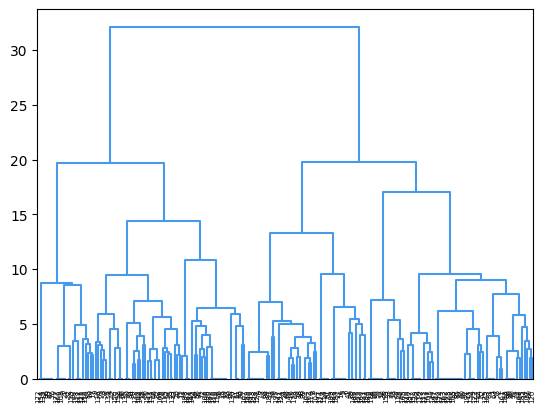

In [9]:
dendo=linkage(df_scaled, 'ward')
color = 'blue'
def color_func(x):
    rgb_color = (71, 153, 235)  # Por ejemplo, rojo en formato RGB
    hex_color = '#%02x%02x%02x' % rgb_color
    return hex_color

dendograma = sch.dendrogram(dendo, color_threshold=float('inf'), link_color_func=color_func)

### ***Cálculo de Sn***

Convertir el dendrograma en formato newick

In [10]:
def get_newick(node, parent_dist, leaf_names, newick='') -> str:
    """
    Convert sciply.cluster.hierarchy.to_tree()-output to Newick format.

    :param node: output of sciply.cluster.hierarchy.to_tree()
    :param parent_dist: output of sciply.cluster.hierarchy.to_tree().dist
    :param leaf_names: list of leaf names
    :param newick: leave empty, this variable is used in recursion.
    :returns: tree in Newick format
    """
    if node.is_leaf():
        return "%s:%.2f%s" % (leaf_names[node.id], parent_dist - node.dist, newick)
    else:
        if len(newick) > 0:
            newick = "):%.2f%s" % (parent_dist - node.dist, newick)
        else:
            newick = ");"
        newick = get_newick(node.get_left(), node.dist, leaf_names, newick=newick)
        newick = get_newick(node.get_right(), node.dist, leaf_names, newick=",%s" % (newick))
        newick = "(%s" % (newick)
        return newick

Convertir el dendrograma en cadena de texto

In [11]:
def convertir_a_Tree(dendo, leaf_names):
    """
    Convierte la salida de scipy.cluster.hierarchy.to_tree a un objeto ete3.Tree.
    """
    tree1 = hierarchy.to_tree(dendo, False)
    newick_tree1 = get_newick(tree1, tree1.dist, leaf_names)
    tree = ete3.Tree(newick_tree1)

    return tree

In [12]:
arbol_resultante = convertir_a_Tree(dendo,leaf_names=range(0,200))
print(arbol_resultante.write(format=9))

(((((((((((120,80),101),14),185),((168,22),((((71,40),86),88),183))),(((161,2),52),((((63,1),81),103),175))),((((62,44),117),((((122,74),132),191),92)),(((((((((((60,37),85),87),105),109),123),162),163),174),190),197))),((((147,15),107),(121,113)),(((((112,64),129),152),157),140))),(((((170,165),45),119),((((29,13),31),33),159)),((((((38,12),59),65),95),178),186))),(((((((194,131),(160,155)),193),((148,89),41)),((((((6,5),16),27),187),188),199)),((((61,47),114),126),171)),((((((104,8),((110,102),(164,99))),(((98,18),49),((173,26),149))),((((48,24),124),141),195)),(79,73)),((181,84),(((((((68,7),78),127),128),143),146),189))))),(((((((167,50),((53,51),77)),(130,90)),(((((((((((23,19),25),76),118),156),176),180),196),((106,72),91)),(56,54)),142)),(((184,182),198),11)),((((((75,20),43),((((133,35),57),115),55)),(((169,82),46),((179,137),151))),(((36,28),((144,100),(138,94))),((34,30),135))),(((((66,39),192),150),((42,4),134)),((((58,3),69),136),9)))),(((((((17,10),83),116),145),(((125,111

In [15]:
print(arbol_resultante)


                                 /-120
                              /-|
                           /-|   \-80
                          |  |
                        /-|   \-101
                       |  |
                     /-|   \-14
                    |  |
                    |   \-185
                    |
                  /-|      /-168
                 |  |   /-|
                 |  |  |   \-22
                 |  |  |
                 |  |  |            /-71
                 |   \-|         /-|
                 |     |      /-|   \-40
                 |     |     |  |
                 |     |   /-|   \-86
                 |     |  |  |
               /-|      \-|   \-88
              |  |        |
              |  |         \-183
              |  |
              |  |         /-161
              |  |      /-|
              |  |   /-|   \-2
              |  |  |  |
              |  |  |   \-52
              |  |  |
              |  |  |            /-63
              |   \-|  

Hallar todos los subárboles del dendrograma

In [13]:
def asignar_nombres(arbol):

    for i, nodo in enumerate(arbol.traverse()):  #Asigna nombres a los nodos si no tienen uno
        if not nodo.name:
            nodo.name = f"Nodo_{i}"



def obtener_subarboles(arbol):
    subarboles = []  #Inicializa una lista para almacenar los subárboles

    for nodo in arbol.traverse():  #Busca nodos descendientes del nodo iterado
        nodos_descendientes = arbol.search_nodes(name=nodo.name, order=1)

        subarbol = Tree()  #Construye un nuevo árbol con el nodo como raíz y sus descendientes
        subarbol.add_child(nodo.copy())

        for descendiente in nodos_descendientes:
            subarbol.add_child(descendiente.copy())

        subarboles.append(subarbol)

    return subarboles


#Función para obtener la representación en formato de texto de un subárbol
def obtener_texto(subarbol):
    return subarbol.write(format=9)

In [18]:
asignar_nombres(arbol_resultante)
todos_subarboles = obtener_subarboles(arbol_resultante)

# Imprimir la representación en formato de texto de cada subárbol
for i, subarbol in enumerate(todos_subarboles):
    print(f"Subárbol {i + 1} - Representación en formato de texto:")
    print(obtener_texto(subarbol))
    print("\n")

Subárbol 1 - Representación en formato de texto:
((((((((((((120,80),101),14),185),((168,22),((((71,40),86),88),183))),(((161,2),52),((((63,1),81),103),175))),((((62,44),117),((((122,74),132),191),92)),(((((((((((60,37),85),87),105),109),123),162),163),174),190),197))),((((147,15),107),(121,113)),(((((112,64),129),152),157),140))),(((((170,165),45),119),((((29,13),31),33),159)),((((((38,12),59),65),95),178),186))),(((((((194,131),(160,155)),193),((148,89),41)),((((((6,5),16),27),187),188),199)),((((61,47),114),126),171)),((((((104,8),((110,102),(164,99))),(((98,18),49),((173,26),149))),((((48,24),124),141),195)),(79,73)),((181,84),(((((((68,7),78),127),128),143),146),189))))),(((((((167,50),((53,51),77)),(130,90)),(((((((((((23,19),25),76),118),156),176),180),196),((106,72),91)),(56,54)),142)),(((184,182),198),11)),((((((75,20),43),((((133,35),57),115),55)),(((169,82),46),((179,137),151))),(((36,28),((144,100),(138,94))),((34,30),135))),(((((66,39),192),150),((42,4),134)),((((58,3),69)

Determinar los n-subárboles

In [17]:
def obtener_n_subarboles(subarboles, max_n=100):
    """
    Obtiene la lista de n-subárboles para cada valor de n hasta max_n.
    """
    n_subarboles = []

    for n in range(1, max_n + 1):
        n_subarbol = []
        for subarbol in subarboles:
            if len(subarbol) <= n:
                n_subarbol.append(subarbol)
        n_subarboles.append((n, n_subarbol))

    return n_subarboles

In [19]:
n_subs = obtener_n_subarboles(todos_subarboles,200)

for n, subarboles in n_subs:
    print(f"{n}-Subárboles:")
    for subarbol in subarboles:
        print(obtener_texto(subarbol))
    print("\n")

Se truncaron las últimas líneas 5000 del resultado de transmisión.
(141);
(((((68,7),78),127),128));
(143);
(167);
(50);
((53,51));
(77);
(((((((((23,19),25),76),118),156),176),180),196));
(((106,72),91));
(56);
(54);
((75,20));
(43);
((((133,35),57),115));
(55);
((169,82));
(46);
((179,137));
(151);
(36);
(28);
((144,100));
((138,94));
(34);
(30);
((66,39));
(192);
(42);
(4);
((58,3));
(69);
((17,10));
(83);
(125);
(111);
((21,0));
(108);
((70,67));
(93);
(((120,80),101));
(14);
(168);
(22);
((((71,40),86),88));
(183);
(161);
(2);
(((63,1),81));
(103);
(62);
(44);
(((122,74),132));
(191);
(((((((((60,37),85),87),105),109),123),162),163));
(174);
((112,64));
(129);
(29);
(13);
((38,12));
(59);
(194);
(131);
(160);
(155);
(((6,5),16));
(27);
(104);
(8);
((110,102));
((164,99));
((98,18));
(49);
((173,26));
(149);
((48,24));
(124);
((((68,7),78),127));
(128);
(53);
(51);
((((((((23,19),25),76),118),156),176),180));
(196);
((106,72));
(91);
(75);
(20);
(((133,35),57));
(115);
(169);
(82);

Determinar los n-subárboles maximales

In [20]:
def es_contenido(subarbol1, subarbol2):
    """
    Verifica si subarbol1 está contenido en subarbol2.
    """
    raiz_subarbol1 = subarbol1.children[0]   #Obtiene el nodo raíz del subarbol1, accediendo al primer hijo del subárbol

    for nodo_subarbol2 in subarbol2.traverse():  #Itera sobre los nodos del subarbol2
        if nodo_subarbol2.name == raiz_subarbol1.name:  #Verifica si el nombre del nodo raíz de subarbol1 está en subarbol2
            return True
            break
    return False


def obtener_maximales(n_subarboles):
    """
    Obtiene los n-subarboles maximales a partir de la lista de n-subarboles.
    """
    maximales = []  #Inicializa una lista para los maximales en cada n
    subarboles_no_maximales = set()

    for n, subarboles in n_subarboles:
        subarboles_maximales = []  #Inicializa una lista para los maximales

        if n == 1:  #Los 1-subárboles siempre son maximales
            subarboles_maximales.extend(subarboles)
            maximales.append((n, subarboles_maximales))
        else:
            for subarbol in subarboles:
                if len(subarbol.get_leaf_names()) == n:  #Los n-subárboles con exactamente n hojas siempre son maximales
                    subarboles_maximales.append(subarbol)
                else:
                    es_maximal = True
                    for otro_subarbol in subarboles:  #Comprueba si el subárbol está contenido en otro subárbol
                        if subarbol != otro_subarbol and es_contenido(subarbol, otro_subarbol):
                            es_maximal = False
                            subarboles_no_maximales.add(subarbol)  #Agrega el subárbol no maximal al conjunto para no volver a revisarlo después
                            break

                    if es_maximal and subarbol not in subarboles_no_maximales:  #Verifica si es maximal y no se ha marcado como no maximal antes
                        subarboles_maximales.append(subarbol)

            maximales.append((n, subarboles_maximales))

    return maximales

In [21]:
maximales = obtener_maximales(n_subs)

# Imprimir o procesar la lista de n-subarboles maximales
for n, subarboles in maximales:
    print(f"{n}-Subárboles maximales:")
    for subarbol in subarboles:
        print(obtener_texto(subarbol))
    print("\n")

1-Subárboles maximales:
(172);
(186);
(171);
(11);
(154);
(140);
(119);
(159);
(178);
(199);
(126);
(79);
(73);
(181);
(84);
(189);
(142);
(198);
(9);
(145);
(97);
(153);
(32);
(177);
(139);
(197);
(107);
(121);
(113);
(157);
(45);
(33);
(95);
(193);
(41);
(188);
(114);
(195);
(146);
(130);
(90);
(184);
(182);
(135);
(150);
(134);
(136);
(116);
(158);
(166);
(96);
(185);
(52);
(175);
(117);
(92);
(190);
(147);
(15);
(152);
(170);
(165);
(31);
(65);
(148);
(89);
(187);
(61);
(47);
(141);
(143);
(167);
(50);
(77);
(56);
(54);
(43);
(55);
(46);
(151);
(36);
(28);
(34);
(30);
(192);
(42);
(4);
(69);
(83);
(125);
(111);
(108);
(93);
(14);
(168);
(22);
(183);
(161);
(2);
(103);
(62);
(44);
(191);
(174);
(129);
(29);
(13);
(59);
(194);
(131);
(160);
(155);
(27);
(104);
(8);
(49);
(149);
(124);
(128);
(53);
(51);
(196);
(91);
(75);
(20);
(115);
(169);
(82);
(179);
(137);
(144);
(100);
(138);
(94);
(66);
(39);
(58);
(3);
(17);
(10);
(21);
(0);
(70);
(67);
(101);
(88);
(81);
(132);
(163);
(112);

Calcular Sn

In [22]:
def calcular_sn(maximales):
    """
    Calcula y devuelve la lista Sn a partir de la lista de n-subárboles maximales.
    """
    Sn = []  # Inicializa la lista para los valores de Sn

    for n, subarboles in maximales:
        Sj = len(subarboles)  # Inicializa con la cantidad de n-subárboles maximales
        for subarbol in subarboles:
            Sj *= len(subarbol)  # Actualiza Sj con el valor de la operación
        Sn.append((n, Sj))

    return Sn

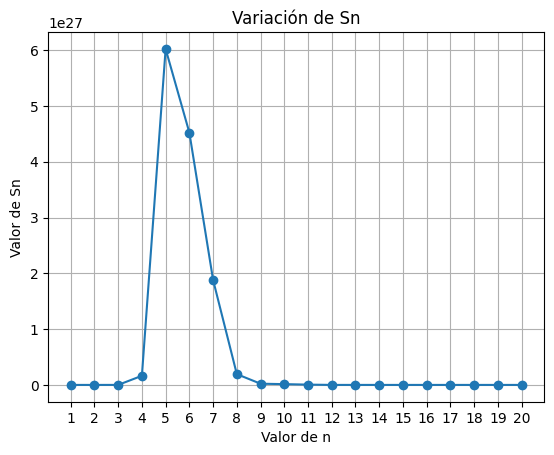

In [23]:
Sn = calcular_sn(maximales)


# Limitar la lista de tuplas a las primeras 20
lista_tuplas = Sn[:20]

# Extraer las coordenadas x e y de las tuplas
x_coords = range(1, len(lista_tuplas) + 1)  # Valores consecutivos de 1 en 1
y_coords = [tupla[1] for tupla in lista_tuplas]

# Graficar los puntos y conectarlos con líneas
plt.plot(x_coords, y_coords, marker='o', linestyle='-')

# Establecer los valores de las etiquetas del eje x
plt.xticks(x_coords)

# Etiquetas de los ejes
plt.xlabel('Valor de n')
plt.ylabel('Valor de Sn')

# Título del gráfico
plt.title('Variación de Sn')

# Mostrar el gráfico
plt.grid(True)
plt.show()


# Imprimir la lista Sn
#for n, s in Sn:
 #   subindice = ''.join(chr(0x2080 + int(digito)) for digito in str(n))
  #  print(f"S{subindice}:", s)

### ***Base topológica***

Función que agrupa el valor de Sn, n y la base, 3 codigos anteriores

In [ ]:
def base_topologica(Sn, maximales):
    """
    Encuentra el valor máximo en Sn y los subárboles maximales correspondientes.
    Imprime la base topológica y devuelve la lista Base.
    """
    maximo_valor = max(Sn, key=lambda x: x[1])
    k = maximo_valor[0]

    n_subarboles_maximales = None

    for n, subarboles in maximales:
        if n == k:
            n_subarboles_maximales = subarboles
            break

    print(f"Valor máximo en Sn: {maximo_valor}")
    print(f"El valor de n es {k}")

    Base = []

    for subarbol in n_subarboles_maximales:
        y = []
        for node in subarbol.traverse():
            if node.is_leaf():
                elem = node.name
                y.append(elem)
        Base.append(y)

    subindice_k = ''.join(chr(0x2080 + int(digito)) for digito in str(k))
    print(f"Base topológica B{subindice_k}: {Base}")

    return Base



# Llamada a la función y asignación del resultado a la variable 'base_resultado'
Base_resultados=base_topologica(Sn, maximales)

Valor máximo en Sn: (5, 6022998000000000000000000000)
El valor de n es 5
Base topológica B₅: [['171', '126', '114', '61', '47'], ['11', '198', '184', '182'], ['172'], ['107', '121', '113', '147', '15'], ['119', '45', '170', '165'], ['159', '33', '31', '29', '13'], ['186'], ['79', '73'], ['181', '84'], ['9', '136', '69', '58', '3'], ['145', '116', '83', '17', '10'], ['97', '158', '125', '111'], ['153', '32'], ['177', '166', '108', '21', '0'], ['139', '96', '93', '70', '67'], ['154'], ['157', '152', '129', '112', '64'], ['140'], ['95', '65', '59', '38', '12'], ['178'], ['193', '194', '131', '160', '155'], ['41', '148', '89'], ['199'], ['195', '141', '124', '48', '24'], ['189'], ['167', '50', '77', '53', '51'], ['130', '90'], ['142'], ['135', '34', '30'], ['150', '192', '66', '39'], ['134', '42', '4'], ['185', '14', '101', '120', '80'], ['52', '161', '2'], ['175', '103', '81', '63', '1'], ['117', '62', '44'], ['92', '191', '132', '122', '74'], ['197'], ['187', '27', '16', '6', '5'], ['188

### ***Puntos de la base***

***Exterior***

In [ ]:
def exterior(Base, conjunto,df):
    """
    Calcula y muestra la extensión.
    """
    Ext = []

    for i in Base:
        if not any(elem in conjunto for elem in i):
            Ext.extend(i)

    Ext_enteros = [int(elemento) for elemento in Ext]
    tabla = df.loc[Ext_enteros]

    print(f"Ext = {Ext}")
    return tabla

***Interior***

In [ ]:
def interior(Base,conjunto,df):
    Int = []

    for i in Base:
        if all(elem in conjunto for elem in i):
            Int.extend(i)

    Int_enteros = [int(elemento) for elemento in Int]
    tabla = df.loc[Int_enteros]

    print(f"Int = {Int}")
    return tabla

***Adherencia***

In [ ]:
def adherencia(Base,A,df):
        Adh = []

        for i in Base:
          if any(elem in A for elem in i):
           Adh.extend(i)

        Adh_enteros = [int(elemento) for elemento in Adh]
        tabla = df.loc[Adh_enteros]

        print(f"Adh = {Adh}")
        return tabla


***Límite***

In [ ]:
def limite(Base,A,df):
  Lim = []

  for i in Base:
    for m in i:
      if any(elem in A for elem in i if elem != m):
        Lim.append(m)

  Lim_enteros = [int(elemento) for elemento in Lim]
  tabla = df.loc[Lim_enteros]

  print(f"Lim = {Lim}")
  return tabla


***Frontera***

In [ ]:
def frontera(Base,A,df):
  Fr = []

  for i in Base:
      if any(elem in A for elem in i) and any(elem not in A for elem in i):
          Fr.extend(i)

  Fr_enteros = [int(elemento) for elemento in Fr]
  tabla = df.loc[Fr_enteros]

  print(f"Fr = {Fr}")
  return tabla

### ***Análisis topológico***

Tomar los diferentes rangos de edades como subconjuntos a estudiar

In [ ]:
categorias_unicas = df['age'].unique()
print(categorias_unicas)

['19-25' '12-18' '33-40' '60+' '26-32' '40-50' '50-60']


In [ ]:
edades1 = dfprueba[dfprueba['age']=='12-18']
edades1

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
4,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
9,12-18,4,5,1.5,2,5,-1.0,-0.5,1.0,0.0,-1.0,0.5
18,12-18,5,4,0.5,3,3,0.0,-0.5,0.5,1.0,0.0,0.5
42,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
43,12-18,9,7,0.5,3,2,-0.5,0.5,1.0,1.0,-0.5,0.0
46,12-18,9,12,0.5,3,2,0.0,0.5,0.0,0.5,0.0,-0.5
79,12-18,4,9,0.5,1,2,-1.0,-1.0,1.0,-0.5,0.5,0.5
84,12-18,7,5,0.5,2,1,0.0,0.5,0.5,1.0,0.5,0.5
98,12-18,5,4,0.5,3,3,0.0,-0.5,0.5,1.0,0.0,0.5
104,12-18,7,4,0.5,1,1,-0.5,-1.0,-0.5,0.0,0.0,0.5


In [ ]:
A1 = list(edades1.index.astype(str))

Puntos de A1

In [ ]:
interior(Base_resultados,A1,dfprueba)

Int = ['181', '84', '134', '42', '4']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
181,12-18,9,5,0.5,2,2,-0.5,0.0,0.5,0.5,0.5,0.0
84,12-18,7,5,0.5,2,1,0.0,0.5,0.5,1.0,0.5,0.5
134,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
42,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
4,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5


In [ ]:
exterior(Base_resultados,A1,dfprueba)

Ext = ['171', '126', '114', '61', '47', '11', '198', '184', '182', '172', '107', '121', '113', '147', '15', '159', '33', '31', '29', '13', '186', '145', '116', '83', '17', '10', '97', '158', '125', '111', '153', '32', '177', '166', '108', '21', '0', '139', '96', '93', '70', '67', '154', '157', '152', '129', '112', '64', '140', '95', '65', '59', '38', '12', '178', '193', '194', '131', '160', '155', '41', '148', '89', '199', '195', '141', '124', '48', '24', '189', '167', '50', '77', '53', '51', '130', '90', '142', '135', '34', '30', '185', '14', '101', '120', '80', '52', '161', '2', '175', '103', '81', '63', '1', '117', '62', '44', '92', '191', '132', '122', '74', '197', '187', '27', '16', '6', '5', '188', '146', '56', '54', '55', '115', '57', '133', '35', '151', '179', '137', '36', '28', '144', '100', '138', '94', '168', '22', '183', '88', '86', '71', '40', '190', '110', '102', '164', '99', '128', '127', '78', '68', '7', '143', '91', '106', '72', '174', '196', '163', '180', '162', '176'

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
171,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
126,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
114,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
61,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
47,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
87,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
85,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
60,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
37,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0


In [ ]:
adherencia(Base_resultados,A1,dfprueba)

Adh = ['119', '45', '170', '165', '79', '73', '181', '84', '9', '136', '69', '58', '3', '150', '192', '66', '39', '134', '42', '4', '43', '75', '20', '46', '169', '82', '104', '8', '49', '98', '18', '149', '173', '26']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
119,12-18,11,7,2.5,4,5,-0.5,0.0,-0.5,1.0,0.0,1.0
45,19-25,7,7,2.5,4,3,0.0,0.0,0.0,1.0,1.0,1.0
170,50-60,7,7,2.5,5,4,-0.5,0.5,0.5,1.0,0.5,0.5
165,50-60,7,7,2.5,5,4,-0.5,0.5,0.5,1.0,0.5,0.5
79,12-18,4,9,0.5,1,2,-1.0,-1.0,1.0,-0.5,0.5,0.5
73,19-25,9,9,0.5,1,3,-0.5,-0.5,0.5,1.0,1.0,1.0
181,12-18,9,5,0.5,2,2,-0.5,0.0,0.5,0.5,0.5,0.0
84,12-18,7,5,0.5,2,1,0.0,0.5,0.5,1.0,0.5,0.5
9,12-18,4,5,1.5,2,5,-1.0,-0.5,1.0,0.0,-1.0,0.5
136,19-25,7,5,1.5,1,4,-0.5,-0.5,0.0,0.0,0.0,0.0


In [ ]:
limite(Base_resultados,A1,dfprueba)

Lim = ['45', '170', '165', '73', '181', '84', '136', '69', '58', '3', '192', '66', '39', '134', '42', '4', '75', '20', '169', '82', '8', '49', '98', '18', '173', '26']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
45,19-25,7,7,2.5,4,3,0.0,0.0,0.0,1.0,1.0,1.0
170,50-60,7,7,2.5,5,4,-0.5,0.5,0.5,1.0,0.5,0.5
165,50-60,7,7,2.5,5,4,-0.5,0.5,0.5,1.0,0.5,0.5
73,19-25,9,9,0.5,1,3,-0.5,-0.5,0.5,1.0,1.0,1.0
181,12-18,9,5,0.5,2,2,-0.5,0.0,0.5,0.5,0.5,0.0
84,12-18,7,5,0.5,2,1,0.0,0.5,0.5,1.0,0.5,0.5
136,19-25,7,5,1.5,1,4,-0.5,-0.5,0.0,0.0,0.0,0.0
69,19-25,5,5,0.5,3,4,-0.5,-1.0,0.0,-0.5,-1.0,-0.5
58,26-32,5,5,0.5,3,4,-0.5,-1.0,0.5,0.0,0.0,0.0
3,19-25,7,4,0.5,3,4,-0.5,-1.0,0.5,0.5,-0.5,0.5


In [ ]:
frontera(Base_resultados,A1,dfprueba)

Fr = ['119', '45', '170', '165', '79', '73', '9', '136', '69', '58', '3', '150', '192', '66', '39', '43', '75', '20', '46', '169', '82', '104', '8', '49', '98', '18', '149', '173', '26']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
119,12-18,11,7,2.5,4,5,-0.5,0.0,-0.5,1.0,0.0,1.0
45,19-25,7,7,2.5,4,3,0.0,0.0,0.0,1.0,1.0,1.0
170,50-60,7,7,2.5,5,4,-0.5,0.5,0.5,1.0,0.5,0.5
165,50-60,7,7,2.5,5,4,-0.5,0.5,0.5,1.0,0.5,0.5
79,12-18,4,9,0.5,1,2,-1.0,-1.0,1.0,-0.5,0.5,0.5
73,19-25,9,9,0.5,1,3,-0.5,-0.5,0.5,1.0,1.0,1.0
9,12-18,4,5,1.5,2,5,-1.0,-0.5,1.0,0.0,-1.0,0.5
136,19-25,7,5,1.5,1,4,-0.5,-0.5,0.0,0.0,0.0,0.0
69,19-25,5,5,0.5,3,4,-0.5,-1.0,0.0,-0.5,-1.0,-0.5
58,26-32,5,5,0.5,3,4,-0.5,-1.0,0.5,0.0,0.0,0.0


Edades 2

In [ ]:
edades2 = dfprueba[dfprueba['age']=='19-25']
#n = len(edades1)
edades2

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
2,19-25,7,4,1.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0
3,19-25,7,4,0.5,3,4,-0.5,-1.0,0.5,0.5,-0.5,0.5
7,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0
8,19-25,5,5,0.5,1,2,-0.5,-1.0,0.5,0.5,0.5,1.0
14,19-25,9,7,0.5,5,3,0.5,0.5,1.0,1.0,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
189,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0
193,19-25,7,11,0.5,3,3,1.0,-1.0,1.0,-1.0,-1.0,1.0
194,19-25,7,7,0.5,1,3,0.5,-0.5,-0.5,0.0,0.0,0.5
195,19-25,5,5,0.5,1,3,0.0,0.0,0.5,0.5,-0.5,0.5


In [ ]:
B1 = list(edades2.index.astype(str))

In [ ]:
interior(Base_resultados,B1,dfprueba)

Int = ['172', '139', '96', '93', '70', '67', '154', '140', '193', '194', '131', '160', '155', '195', '141', '124', '48', '24', '189', '130', '90', '142', '185', '14', '101', '120', '80', '52', '161', '2', '146', '128', '127', '78', '68', '7', '143', '196']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
172,19-25,11,12,3.0,3,4,0.5,-1.0,0.0,-0.5,-1.0,-0.5
139,19-25,11,12,3.0,3,4,0.5,-1.0,0.0,-0.5,-1.0,-0.5
96,19-25,11,12,3.0,3,4,0.5,-1.0,0.0,-0.5,-1.0,-0.5
93,19-25,11,12,3.0,3,4,0.5,-1.0,0.0,-0.5,-1.0,-0.5
70,19-25,11,12,3.0,3,4,0.5,-1.0,0.0,-0.5,-1.0,-0.5
67,19-25,11,12,3.0,3,4,0.5,-1.0,0.0,-0.5,-1.0,-0.5
154,19-25,11,12,3.0,3,4,0.5,-1.0,0.0,-0.5,-1.0,-0.5
140,19-25,9,7,2.5,2,1,0.5,0.5,-0.5,0.5,0.5,1.0
193,19-25,7,11,0.5,3,3,1.0,-1.0,1.0,-1.0,-1.0,1.0
194,19-25,7,7,0.5,1,3,0.5,-0.5,-0.5,0.0,0.0,0.5


In [ ]:
exterior(Base_resultados,B1,dfprueba)

Ext = ['171', '126', '114', '61', '47', '11', '198', '184', '182', '107', '121', '113', '147', '15', '159', '33', '31', '29', '13', '186', '181', '84', '97', '158', '125', '111', '153', '32', '177', '166', '108', '21', '0', '157', '152', '129', '112', '64', '95', '65', '59', '38', '12', '178', '199', '135', '34', '30', '150', '192', '66', '39', '134', '42', '4', '175', '103', '81', '63', '1', '197', '187', '27', '16', '6', '5', '188', '46', '169', '82', '183', '88', '86', '71', '40', '190', '174', '163', '180', '162', '176', '123', '118', '76', '25', '23', '19', '156', '105', '87', '85', '60', '37', '109']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
171,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
126,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
114,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
61,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
47,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
87,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
85,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
60,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
37,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0


In [ ]:
adherencia(Base_resultados,B1,dfprueba)

Adh = ['172', '119', '45', '170', '165', '79', '73', '9', '136', '69', '58', '3', '145', '116', '83', '17', '10', '139', '96', '93', '70', '67', '154', '140', '193', '194', '131', '160', '155', '41', '148', '89', '195', '141', '124', '48', '24', '189', '167', '50', '77', '53', '51', '130', '90', '142', '185', '14', '101', '120', '80', '52', '161', '2', '117', '62', '44', '92', '191', '132', '122', '74', '146', '56', '54', '43', '75', '20', '55', '115', '57', '133', '35', '151', '179', '137', '36', '28', '144', '100', '138', '94', '168', '22', '104', '8', '110', '102', '164', '99', '49', '98', '18', '149', '173', '26', '128', '127', '78', '68', '7', '143', '91', '106', '72', '196']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
172,19-25,11,12,3.0,3,4,0.5,-1.0,0.0,-0.5,-1.0,-0.5
119,12-18,11,7,2.5,4,5,-0.5,0.0,-0.5,1.0,0.0,1.0
45,19-25,7,7,2.5,4,3,0.0,0.0,0.0,1.0,1.0,1.0
170,50-60,7,7,2.5,5,4,-0.5,0.5,0.5,1.0,0.5,0.5
165,50-60,7,7,2.5,5,4,-0.5,0.5,0.5,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
143,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0
91,33-40,9,11,0.5,4,3,-1.0,-1.0,-1.0,0.0,-1.0,-1.0
106,19-25,9,9,0.5,4,3,-0.5,-0.5,-1.0,-0.5,0.0,-1.0
72,26-32,7,9,0.5,4,3,0.0,0.0,-0.5,0.0,-0.5,-1.0


In [ ]:
limite(Base_resultados,B1,dfprueba)

Lim = ['119', '170', '165', '79', '9', '136', '69', '58', '3', '145', '83', '17', '10', '139', '96', '93', '70', '67', '193', '194', '131', '160', '155', '148', '89', '195', '141', '124', '48', '24', '167', '50', '77', '53', '51', '130', '90', '185', '14', '101', '120', '80', '52', '161', '2', '117', '62', '44', '191', '132', '122', '74', '54', '43', '75', '55', '115', '57', '133', '35', '179', '137', '28', '144', '100', '138', '94', '22', '104', '110', '102', '164', '99', '98', '18', '149', '173', '26', '128', '127', '78', '68', '7', '91', '72']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
119,12-18,11,7,2.5,4,5,-0.5,0.0,-0.5,1.0,0.0,1.0
170,50-60,7,7,2.5,5,4,-0.5,0.5,0.5,1.0,0.5,0.5
165,50-60,7,7,2.5,5,4,-0.5,0.5,0.5,1.0,0.5,0.5
79,12-18,4,9,0.5,1,2,-1.0,-1.0,1.0,-0.5,0.5,0.5
9,12-18,4,5,1.5,2,5,-1.0,-0.5,1.0,0.0,-1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
78,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0
68,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0
7,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0
91,33-40,9,11,0.5,4,3,-1.0,-1.0,-1.0,0.0,-1.0,-1.0


In [ ]:
frontera(Base_resultados,B1,dfprueba)

Fr = ['119', '45', '170', '165', '79', '73', '9', '136', '69', '58', '3', '145', '116', '83', '17', '10', '41', '148', '89', '167', '50', '77', '53', '51', '117', '62', '44', '92', '191', '132', '122', '74', '56', '54', '43', '75', '20', '55', '115', '57', '133', '35', '151', '179', '137', '36', '28', '144', '100', '138', '94', '168', '22', '104', '8', '110', '102', '164', '99', '49', '98', '18', '149', '173', '26', '91', '106', '72']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
119,12-18,11,7,2.5,4,5,-0.5,0.0,-0.5,1.0,0.0,1.0
45,19-25,7,7,2.5,4,3,0.0,0.0,0.0,1.0,1.0,1.0
170,50-60,7,7,2.5,5,4,-0.5,0.5,0.5,1.0,0.5,0.5
165,50-60,7,7,2.5,5,4,-0.5,0.5,0.5,1.0,0.5,0.5
79,12-18,4,9,0.5,1,2,-1.0,-1.0,1.0,-0.5,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
173,19-25,7,4,0.5,2,3,0.0,-1.0,0.0,0.0,0.0,0.0
26,19-25,5,4,0.5,2,3,0.0,-0.5,0.0,0.0,0.0,0.0
91,33-40,9,11,0.5,4,3,-1.0,-1.0,-1.0,0.0,-1.0,-1.0
106,19-25,9,9,0.5,4,3,-0.5,-0.5,-1.0,-0.5,0.0,-1.0


Edades 3

In [ ]:
edades3 = dfprueba[dfprueba['age']=='26-32']
#n = len(edades1)
edades3

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
1,26-32,9,7,0.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0
10,26-32,11,11,2.5,2,2,0.0,0.0,0.0,0.0,0.0,0.0
15,26-32,9,11,1.5,3,2,0.5,1.0,0.0,1.0,0.5,0.5
28,26-32,11,12,0.5,3,3,0.0,0.0,-1.0,-1.0,0.0,0.0
37,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
47,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
51,26-32,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
53,26-32,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
57,26-32,7,7,1.5,3,3,0.0,0.0,0.0,0.5,0.0,0.0
58,26-32,5,5,0.5,3,4,-0.5,-1.0,0.5,0.0,0.0,0.0


In [ ]:
C1 = list(edades3.index.astype(str))

In [ ]:
interior(Base_resultados,C1,dfprueba)

Int = ['171', '126', '114', '61', '47', '175', '103', '81', '63', '1', '197', '190', '174', '163', '162', '123', '105', '87', '85', '60', '37', '109']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
171,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
126,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
114,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
61,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
47,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
175,26-32,9,7,0.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0
103,26-32,9,7,0.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0
81,26-32,9,7,0.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0
63,26-32,9,7,0.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0
1,26-32,9,7,0.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
exterior(Base_resultados,C1,dfprueba)

Ext = ['11', '198', '184', '182', '172', '119', '45', '170', '165', '159', '33', '31', '29', '13', '186', '79', '73', '181', '84', '153', '32', '177', '166', '108', '21', '0', '139', '96', '93', '70', '67', '154', '157', '152', '129', '112', '64', '140', '95', '65', '59', '38', '12', '178', '193', '194', '131', '160', '155', '41', '148', '89', '199', '195', '141', '124', '48', '24', '189', '130', '90', '142', '135', '34', '30', '150', '192', '66', '39', '134', '42', '4', '185', '14', '101', '120', '80', '52', '161', '2', '117', '62', '44', '187', '27', '16', '6', '5', '188', '146', '56', '54', '43', '75', '20', '151', '179', '137', '168', '22', '183', '88', '86', '71', '40', '104', '8', '110', '102', '164', '99', '49', '98', '18', '149', '173', '26', '128', '127', '78', '68', '7', '143', '196', '180', '176', '118', '76', '25', '23', '19', '156']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
11,50-60,5,5,0.5,3,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
198,50-60,4,4,0.5,1,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
184,50-60,4,4,0.5,1,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
182,50-60,4,4,0.5,1,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
172,19-25,11,12,3.0,3,4,0.5,-1.0,0.0,-0.5,-1.0,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
76,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
25,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
23,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
19,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5


In [ ]:
adherencia(Base_resultados,C1,dfprueba)

Adh = ['171', '126', '114', '61', '47', '107', '121', '113', '147', '15', '9', '136', '69', '58', '3', '145', '116', '83', '17', '10', '97', '158', '125', '111', '167', '50', '77', '53', '51', '175', '103', '81', '63', '1', '92', '191', '132', '122', '74', '197', '55', '115', '57', '133', '35', '46', '169', '82', '36', '28', '144', '100', '138', '94', '190', '91', '106', '72', '174', '163', '162', '123', '105', '87', '85', '60', '37', '109']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
171,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
126,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
114,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
61,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
47,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
87,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
85,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
60,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
37,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0


In [ ]:
limite(Base_resultados,C1,dfprueba)

Lim = ['171', '126', '114', '61', '47', '107', '121', '113', '147', '15', '9', '136', '69', '3', '145', '116', '83', '17', '10', '97', '158', '125', '111', '167', '50', '77', '53', '51', '175', '103', '81', '63', '1', '92', '191', '132', '122', '74', '55', '115', '133', '35', '46', '169', '82', '36', '144', '100', '138', '94', '91', '106', '105', '87', '85', '60', '37']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
171,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
126,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
114,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
61,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
47,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
107,26-32,7,9,2.5,3,3,0.5,0.5,0.5,1.0,0.0,0.5
121,26-32,9,5,1.5,2,3,0.5,0.5,0.5,0.5,0.5,0.5
113,26-32,9,5,1.5,2,3,0.5,0.5,0.5,0.5,0.5,0.5
147,33-40,9,9,1.5,2,2,0.5,0.5,0.5,1.0,0.5,0.5
15,26-32,9,11,1.5,3,2,0.5,1.0,0.0,1.0,0.5,0.5


In [ ]:
frontera(Base_resultados,C1,dfprueba)

Fr = ['107', '121', '113', '147', '15', '9', '136', '69', '58', '3', '145', '116', '83', '17', '10', '97', '158', '125', '111', '167', '50', '77', '53', '51', '92', '191', '132', '122', '74', '55', '115', '57', '133', '35', '46', '169', '82', '36', '28', '144', '100', '138', '94', '91', '106', '72']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
107,26-32,7,9,2.5,3,3,0.5,0.5,0.5,1.0,0.0,0.5
121,26-32,9,5,1.5,2,3,0.5,0.5,0.5,0.5,0.5,0.5
113,26-32,9,5,1.5,2,3,0.5,0.5,0.5,0.5,0.5,0.5
147,33-40,9,9,1.5,2,2,0.5,0.5,0.5,1.0,0.5,0.5
15,26-32,9,11,1.5,3,2,0.5,1.0,0.0,1.0,0.5,0.5
9,12-18,4,5,1.5,2,5,-1.0,-0.5,1.0,0.0,-1.0,0.5
136,19-25,7,5,1.5,1,4,-0.5,-0.5,0.0,0.0,0.0,0.0
69,19-25,5,5,0.5,3,4,-0.5,-1.0,0.0,-0.5,-1.0,-0.5
58,26-32,5,5,0.5,3,4,-0.5,-1.0,0.5,0.0,0.0,0.0
3,19-25,7,4,0.5,3,4,-0.5,-1.0,0.5,0.5,-0.5,0.5


Edades 4

In [ ]:
edades4 = dfprueba[dfprueba['age']=='33-40']
#n = len(edades1)
edades4

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
13,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
29,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
30,33-40,9,9,0.5,5,5,-1.0,0.0,0.5,0.5,-0.5,0.0
31,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
33,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
34,33-40,9,9,0.5,5,5,-1.0,0.0,0.5,0.5,-0.5,0.0
39,33-40,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0
66,33-40,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0
91,33-40,9,11,0.5,4,3,-1.0,-1.0,-1.0,0.0,-1.0,-1.0
97,33-40,11,11,2.5,4,4,0.0,0.0,0.0,-1.0,0.0,-1.0


In [ ]:
D1 = list(edades4.index.astype(str))

In [ ]:
interior(Base_resultados,D1,dfprueba)

Int = ['159', '33', '31', '29', '13', '135', '34', '30']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
159,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
33,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
31,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
29,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
13,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
135,33-40,9,9,0.5,5,5,-1.0,0.0,0.5,0.5,-0.5,0.0
34,33-40,9,9,0.5,5,5,-1.0,0.0,0.5,0.5,-0.5,0.0
30,33-40,9,9,0.5,5,5,-1.0,0.0,0.5,0.5,-0.5,0.0


In [ ]:
exterior(Base_resultados,D1,dfprueba)

Ext = ['171', '126', '114', '61', '47', '11', '198', '184', '182', '172', '119', '45', '170', '165', '186', '79', '73', '181', '84', '9', '136', '69', '58', '3', '145', '116', '83', '17', '10', '153', '32', '177', '166', '108', '21', '0', '139', '96', '93', '70', '67', '154', '157', '152', '129', '112', '64', '140', '95', '65', '59', '38', '12', '178', '193', '194', '131', '160', '155', '41', '148', '89', '199', '195', '141', '124', '48', '24', '189', '167', '50', '77', '53', '51', '130', '90', '142', '134', '42', '4', '185', '14', '101', '120', '80', '52', '161', '2', '175', '103', '81', '63', '1', '117', '62', '44', '92', '191', '132', '122', '74', '197', '187', '27', '16', '6', '5', '188', '146', '56', '54', '43', '75', '20', '55', '115', '57', '133', '35', '46', '169', '82', '36', '28', '144', '100', '138', '94', '168', '22', '183', '88', '86', '71', '40', '190', '104', '8', '110', '102', '164', '99', '49', '98', '18', '149', '173', '26', '128', '127', '78', '68', '7', '143', '174'

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
171,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
126,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
114,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
61,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
47,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
87,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
85,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
60,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
37,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0


In [ ]:
adherencia(Base_resultados,D1,dfprueba)

Adh = ['107', '121', '113', '147', '15', '159', '33', '31', '29', '13', '97', '158', '125', '111', '135', '34', '30', '150', '192', '66', '39', '151', '179', '137', '91', '106', '72']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
107,26-32,7,9,2.5,3,3,0.5,0.5,0.5,1.0,0.0,0.5
121,26-32,9,5,1.5,2,3,0.5,0.5,0.5,0.5,0.5,0.5
113,26-32,9,5,1.5,2,3,0.5,0.5,0.5,0.5,0.5,0.5
147,33-40,9,9,1.5,2,2,0.5,0.5,0.5,1.0,0.5,0.5
15,26-32,9,11,1.5,3,2,0.5,1.0,0.0,1.0,0.5,0.5
159,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
33,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
31,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
29,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
13,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0


In [ ]:
frontera(Base_resultados,D1,dfprueba)

Fr = ['107', '121', '113', '147', '15', '97', '158', '125', '111', '150', '192', '66', '39', '151', '179', '137', '91', '106', '72']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
107,26-32,7,9,2.5,3,3,0.5,0.5,0.5,1.0,0.0,0.5
121,26-32,9,5,1.5,2,3,0.5,0.5,0.5,0.5,0.5,0.5
113,26-32,9,5,1.5,2,3,0.5,0.5,0.5,0.5,0.5,0.5
147,33-40,9,9,1.5,2,2,0.5,0.5,0.5,1.0,0.5,0.5
15,26-32,9,11,1.5,3,2,0.5,1.0,0.0,1.0,0.5,0.5
97,33-40,11,11,2.5,4,4,0.0,0.0,0.0,-1.0,0.0,-1.0
158,26-32,11,12,1.5,2,2,0.0,0.0,0.0,-1.0,0.0,-0.5
125,26-32,11,12,1.5,2,2,0.0,0.0,0.0,-1.0,0.0,-0.5
111,26-32,11,12,1.5,2,2,0.0,0.0,0.0,-1.0,0.0,-0.5
150,12-18,7,5,1.5,5,5,0.0,0.5,-0.5,0.0,-0.5,-0.5


In [ ]:
limite(Base_resultados,D1,dfprueba)

Lim = ['107', '121', '113', '15', '159', '33', '31', '29', '13', '158', '125', '111', '135', '34', '30', '150', '192', '66', '39', '151', '179', '137', '106', '72']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
107,26-32,7,9,2.5,3,3,0.5,0.5,0.5,1.0,0.0,0.5
121,26-32,9,5,1.5,2,3,0.5,0.5,0.5,0.5,0.5,0.5
113,26-32,9,5,1.5,2,3,0.5,0.5,0.5,0.5,0.5,0.5
15,26-32,9,11,1.5,3,2,0.5,1.0,0.0,1.0,0.5,0.5
159,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
33,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
31,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
29,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
13,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
158,26-32,11,12,1.5,2,2,0.0,0.0,0.0,-1.0,0.0,-0.5


In [ ]:
edades5 = dfprueba[dfprueba['age']=='40-50']
#n = len(edades1)
edades5

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
0,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5
5,40-50,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
6,40-50,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
16,40-50,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
21,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5
22,40-50,7,7,0.5,2,3,1.0,0.0,0.0,0.5,0.5,0.0
27,40-50,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
40,40-50,7,7,0.5,1,3,0.5,0.5,0.5,0.5,0.5,0.5
54,40-50,7,12,2.5,4,3,-0.5,-1.0,-0.5,-1.0,-1.0,-0.5
55,40-50,7,9,0.5,3,3,0.0,-0.5,0.5,1.0,0.5,-0.5


In [ ]:
E1 = list(edades5.index.astype(str))

In [ ]:
interior(Base_resultados,E1,dfprueba)

Int = ['177', '166', '108', '21', '0', '157', '152', '129', '112', '64', '199', '187', '27', '16', '6', '5', '188', '183', '88', '86', '71', '40']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
177,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5
166,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5
108,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5
21,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5
0,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5
157,40-50,9,9,2.5,2,2,0.0,0.0,0.5,0.5,0.5,0.5
152,40-50,9,9,2.5,2,2,0.0,0.0,0.5,0.5,0.5,0.5
129,40-50,9,9,2.5,2,2,0.0,0.0,0.5,0.5,0.5,0.5
112,40-50,9,9,2.5,2,2,0.0,0.0,0.5,0.5,0.5,0.5
64,40-50,9,9,2.5,2,2,0.0,0.0,0.5,0.5,0.5,0.5


In [ ]:
exterior(Base_resultados,E1,dfprueba)

Ext = ['171', '126', '114', '61', '47', '11', '198', '184', '182', '172', '107', '121', '113', '147', '15', '119', '45', '170', '165', '159', '33', '31', '29', '13', '186', '79', '73', '181', '84', '9', '136', '69', '58', '3', '97', '158', '125', '111', '153', '32', '139', '96', '93', '70', '67', '154', '140', '95', '65', '59', '38', '12', '178', '193', '194', '131', '160', '155', '41', '148', '89', '195', '141', '124', '48', '24', '189', '167', '50', '77', '53', '51', '130', '90', '142', '135', '34', '30', '150', '192', '66', '39', '134', '42', '4', '185', '14', '101', '120', '80', '52', '161', '2', '175', '103', '81', '63', '1', '117', '62', '44', '92', '191', '132', '122', '74', '197', '146', '43', '75', '20', '46', '169', '82', '151', '179', '137', '36', '28', '144', '100', '138', '94', '190', '104', '8', '49', '98', '18', '149', '173', '26', '128', '127', '78', '68', '7', '143', '91', '106', '72', '174', '196', '163', '180', '162', '176', '123', '118', '76', '25', '23', '19', '156

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
171,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
126,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
114,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
61,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
47,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
87,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
85,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
60,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
37,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0


In [ ]:
adherencia(Base_resultados,E1,dfprueba)

Adh = ['145', '116', '83', '17', '10', '177', '166', '108', '21', '0', '157', '152', '129', '112', '64', '199', '187', '27', '16', '6', '5', '188', '56', '54', '55', '115', '57', '133', '35', '168', '22', '183', '88', '86', '71', '40', '110', '102', '164', '99']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
145,26-32,11,12,3.0,2,3,1.0,0.0,0.5,0.5,0.5,-0.5
116,19-25,12,12,1.5,2,2,0.5,-0.5,-0.5,0.5,-0.5,-0.5
83,40-50,11,9,1.5,2,1,0.0,-0.5,0.5,0.5,0.5,0.5
17,50-60,9,11,1.5,3,2,0.0,-0.5,0.5,0.0,0.0,0.0
10,26-32,11,11,2.5,2,2,0.0,0.0,0.0,0.0,0.0,0.0
177,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5
166,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5
108,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5
21,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5
0,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5


In [ ]:
limite(Base_resultados,E1,dfprueba)

Lim = ['145', '116', '17', '10', '177', '166', '108', '21', '0', '157', '152', '129', '112', '64', '187', '27', '16', '6', '5', '56', '115', '57', '133', '35', '168', '183', '88', '86', '71', '40', '110', '164', '99']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
145,26-32,11,12,3.0,2,3,1.0,0.0,0.5,0.5,0.5,-0.5
116,19-25,12,12,1.5,2,2,0.5,-0.5,-0.5,0.5,-0.5,-0.5
17,50-60,9,11,1.5,3,2,0.0,-0.5,0.5,0.0,0.0,0.0
10,26-32,11,11,2.5,2,2,0.0,0.0,0.0,0.0,0.0,0.0
177,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5
166,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5
108,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5
21,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5
0,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5
157,40-50,9,9,2.5,2,2,0.0,0.0,0.5,0.5,0.5,0.5


In [ ]:
frontera(Base_resultados,E1,dfprueba)

Fr = ['145', '116', '83', '17', '10', '56', '54', '55', '115', '57', '133', '35', '168', '22', '110', '102', '164', '99']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
145,26-32,11,12,3.0,2,3,1.0,0.0,0.5,0.5,0.5,-0.5
116,19-25,12,12,1.5,2,2,0.5,-0.5,-0.5,0.5,-0.5,-0.5
83,40-50,11,9,1.5,2,1,0.0,-0.5,0.5,0.5,0.5,0.5
17,50-60,9,11,1.5,3,2,0.0,-0.5,0.5,0.0,0.0,0.0
10,26-32,11,11,2.5,2,2,0.0,0.0,0.0,0.0,0.0,0.0
56,19-25,7,11,1.5,3,4,-0.5,-1.0,-1.0,-1.0,-1.0,-1.0
54,40-50,7,12,2.5,4,3,-0.5,-1.0,-0.5,-1.0,-1.0,-0.5
55,40-50,7,9,0.5,3,3,0.0,-0.5,0.5,1.0,0.5,-0.5
115,19-25,5,7,0.5,4,2,0.0,0.0,0.5,0.0,-0.5,-0.5
57,26-32,7,7,1.5,3,3,0.0,0.0,0.0,0.5,0.0,0.0


In [ ]:
edades6 = dfprueba[dfprueba['age']=='50-60']
#n = len(edades1)
edades6

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
11,50-60,5,5,0.5,3,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
17,50-60,9,11,1.5,3,2,0.0,-0.5,0.5,0.0,0.0,0.0
19,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
23,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
25,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
32,50-60,12,12,2.5,3,3,-0.5,-1.0,-1.0,-1.0,-1.0,-0.5
62,50-60,5,11,0.5,1,1,0.5,0.5,1.0,1.0,1.0,0.0
75,50-60,7,5,0.5,3,2,-0.5,-0.5,0.5,-0.5,-0.5,0.5
76,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
89,50-60,5,12,0.5,1,2,1.0,-0.5,-0.5,-0.5,-0.5,-0.5


In [ ]:
F1 = list(edades6.index.astype(str))

In [ ]:
interior(Base_resultados,F1,dfprueba)

Int = ['11', '198', '184', '182', '153', '32', '180', '176', '118', '76', '25', '23', '19', '156']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
11,50-60,5,5,0.5,3,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
198,50-60,4,4,0.5,1,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
184,50-60,4,4,0.5,1,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
182,50-60,4,4,0.5,1,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
153,50-60,12,12,2.5,3,3,-0.5,-1.0,-1.0,-1.0,-1.0,-0.5
32,50-60,12,12,2.5,3,3,-0.5,-1.0,-1.0,-1.0,-1.0,-0.5
180,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
176,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
118,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
76,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5


In [ ]:
exterior(Base_resultados,F1,dfprueba)

Ext = ['171', '126', '114', '61', '47', '172', '107', '121', '113', '147', '15', '159', '33', '31', '29', '13', '186', '79', '73', '181', '84', '9', '136', '69', '58', '3', '97', '158', '125', '111', '177', '166', '108', '21', '0', '139', '96', '93', '70', '67', '154', '157', '152', '129', '112', '64', '140', '95', '65', '59', '38', '12', '178', '193', '194', '131', '160', '155', '199', '195', '141', '124', '48', '24', '189', '167', '50', '77', '53', '51', '130', '90', '142', '135', '34', '30', '150', '192', '66', '39', '134', '42', '4', '185', '14', '101', '120', '80', '52', '161', '2', '175', '103', '81', '63', '1', '92', '191', '132', '122', '74', '197', '187', '27', '16', '6', '5', '188', '146', '56', '54', '55', '115', '57', '133', '35', '46', '169', '82', '151', '179', '137', '36', '28', '144', '100', '138', '94', '168', '22', '183', '88', '86', '71', '40', '190', '104', '8', '110', '102', '164', '99', '49', '98', '18', '149', '173', '26', '128', '127', '78', '68', '7', '143', '9

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
171,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
126,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
114,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
61,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
47,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
87,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
85,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
60,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
37,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0


In [ ]:
adherencia(Base_resultados,F1,dfprueba)

Adh = ['11', '198', '184', '182', '119', '45', '170', '165', '145', '116', '83', '17', '10', '153', '32', '41', '148', '89', '117', '62', '44', '43', '75', '20', '180', '176', '118', '76', '25', '23', '19', '156']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
11,50-60,5,5,0.5,3,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
198,50-60,4,4,0.5,1,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
184,50-60,4,4,0.5,1,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
182,50-60,4,4,0.5,1,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
119,12-18,11,7,2.5,4,5,-0.5,0.0,-0.5,1.0,0.0,1.0
45,19-25,7,7,2.5,4,3,0.0,0.0,0.0,1.0,1.0,1.0
170,50-60,7,7,2.5,5,4,-0.5,0.5,0.5,1.0,0.5,0.5
165,50-60,7,7,2.5,5,4,-0.5,0.5,0.5,1.0,0.5,0.5
145,26-32,11,12,3.0,2,3,1.0,0.0,0.5,0.5,0.5,-0.5
116,19-25,12,12,1.5,2,2,0.5,-0.5,-0.5,0.5,-0.5,-0.5


In [ ]:
limite(Base_resultados,F1,dfprueba)

Lim = ['11', '198', '184', '182', '119', '45', '170', '165', '145', '116', '83', '10', '153', '32', '41', '148', '89', '117', '44', '43', '20', '118', '76', '25', '23', '19']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
11,50-60,5,5,0.5,3,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
198,50-60,4,4,0.5,1,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
184,50-60,4,4,0.5,1,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
182,50-60,4,4,0.5,1,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
119,12-18,11,7,2.5,4,5,-0.5,0.0,-0.5,1.0,0.0,1.0
45,19-25,7,7,2.5,4,3,0.0,0.0,0.0,1.0,1.0,1.0
170,50-60,7,7,2.5,5,4,-0.5,0.5,0.5,1.0,0.5,0.5
165,50-60,7,7,2.5,5,4,-0.5,0.5,0.5,1.0,0.5,0.5
145,26-32,11,12,3.0,2,3,1.0,0.0,0.5,0.5,0.5,-0.5
116,19-25,12,12,1.5,2,2,0.5,-0.5,-0.5,0.5,-0.5,-0.5


In [ ]:
frontera(Base_resultados,F1,dfprueba)

Fr = ['119', '45', '170', '165', '145', '116', '83', '17', '10', '41', '148', '89', '117', '62', '44', '43', '75', '20']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
119,12-18,11,7,2.5,4,5,-0.5,0.0,-0.5,1.0,0.0,1.0
45,19-25,7,7,2.5,4,3,0.0,0.0,0.0,1.0,1.0,1.0
170,50-60,7,7,2.5,5,4,-0.5,0.5,0.5,1.0,0.5,0.5
165,50-60,7,7,2.5,5,4,-0.5,0.5,0.5,1.0,0.5,0.5
145,26-32,11,12,3.0,2,3,1.0,0.0,0.5,0.5,0.5,-0.5
116,19-25,12,12,1.5,2,2,0.5,-0.5,-0.5,0.5,-0.5,-0.5
83,40-50,11,9,1.5,2,1,0.0,-0.5,0.5,0.5,0.5,0.5
17,50-60,9,11,1.5,3,2,0.0,-0.5,0.5,0.0,0.0,0.0
10,26-32,11,11,2.5,2,2,0.0,0.0,0.0,0.0,0.0,0.0
41,19-25,7,7,0.5,2,2,1.0,-1.0,-1.0,-1.0,1.0,-1.0


In [ ]:
edades7 = dfprueba[dfprueba['age']=='60+']
#n = len(edades1)
edades7

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
12,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
38,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
59,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
65,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
95,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
178,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
186,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
G1 = list(edades7.index.astype(str))

In [ ]:
interior(Base_resultados,G1,dfprueba)

Int = ['186', '95', '65', '59', '38', '12', '178']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
186,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
95,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
65,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
59,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
38,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
12,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
178,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
exterior(Base_resultados,G1,dfprueba)

Ext = ['171', '126', '114', '61', '47', '11', '198', '184', '182', '172', '107', '121', '113', '147', '15', '119', '45', '170', '165', '159', '33', '31', '29', '13', '79', '73', '181', '84', '9', '136', '69', '58', '3', '145', '116', '83', '17', '10', '97', '158', '125', '111', '153', '32', '177', '166', '108', '21', '0', '139', '96', '93', '70', '67', '154', '157', '152', '129', '112', '64', '140', '193', '194', '131', '160', '155', '41', '148', '89', '199', '195', '141', '124', '48', '24', '189', '167', '50', '77', '53', '51', '130', '90', '142', '135', '34', '30', '150', '192', '66', '39', '134', '42', '4', '185', '14', '101', '120', '80', '52', '161', '2', '175', '103', '81', '63', '1', '117', '62', '44', '92', '191', '132', '122', '74', '197', '187', '27', '16', '6', '5', '188', '146', '56', '54', '43', '75', '20', '55', '115', '57', '133', '35', '46', '169', '82', '151', '179', '137', '36', '28', '144', '100', '138', '94', '168', '22', '183', '88', '86', '71', '40', '190', '104',

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
171,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
126,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
114,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
61,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
47,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
87,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
85,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
60,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
37,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0


In [ ]:
adherencia(Base_resultados,G1,dfprueba)

Adh = ['186', '95', '65', '59', '38', '12', '178']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
186,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
95,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
65,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
59,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
38,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
12,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
178,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
limite(Base_resultados,G1,dfprueba)

Lim = ['95', '65', '59', '38', '12']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
95,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
65,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
59,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
38,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
12,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
frontera(Base_resultados,G1,dfprueba)

Fr = []


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
